<h2 style="color:blue" align="left"> Sentiment Analysis- EDA Project </h2>

**Project Tasks**
Apply `description statistics` and Most Common words and Data `Distribution Mapping` in `Barchart` and `world cloud visulaization`. Also `Detect stopwords` from given dataset (sentiment140)

<h2 style="color:orange"> Import Required Libraries </h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import warnings as wr
wr.filterwarnings('ignore')


<h2 style="color:purple"> 1.0 Load Data </h2>

In [2]:
# task 1: load Data
def load_data(file_path):
    df = pd.read_csv(file_path, header=None,
                    encoding='latin-1', names=['target','id','date','meta',
                                              'user', 'text'])
    df['sentiment'] = df['target'].apply(lambda x: 'positive' if x==4 else 'negative')
    df.drop(columns=['id','date','meta','user'], inplace=True)
    
    return df
file_path = 'sentiment140.csv'
df = load_data(file_path)

In [3]:
# Show
df.head()

,target,text,sentiment
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,0,is upset that he can't update his Facebook by ...,negative
2,0,@Kenichan I dived many times for the ball. Man...,negative
3,0,my whole body feels itchy and like its on fire,negative
4,0,"@nationwideclass no, it's not behaving at all....",negative


<h2 style="color:purple"> 2.0 Descriptive Statistics </h2>

In [4]:
# Sample size
num_pos = len(df[df['sentiment']=='positive'])
num_neg = len(df[df['sentiment']=='negative'])
print(num_pos, num_neg)

800000 800000


Its a balanced Dataset

In [5]:
# Average length of text
avg_len = df['text'].apply(lambda x: len(x.split())).mean()  # average lenght
df['text_len'] = df['text'].apply(lambda x: len(x.split()))  # add new col text_length

In [6]:
print(avg_len)

13.176150625


In [13]:
df.head()

,target,text,sentiment,text_len
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,19
1,0,is upset that he can't update his Facebook by ...,negative,21
2,0,@Kenichan I dived many times for the ball. Man...,negative,18
3,0,my whole body feels itchy and like its on fire,negative,10
4,0,"@nationwideclass no, it's not behaving at all....",negative,21


<h2 style="color:purple"> 3.0 Distributoin Mapping </h3>

<h4 style="color:turtle"> 3.1 Bar Chart </h4>

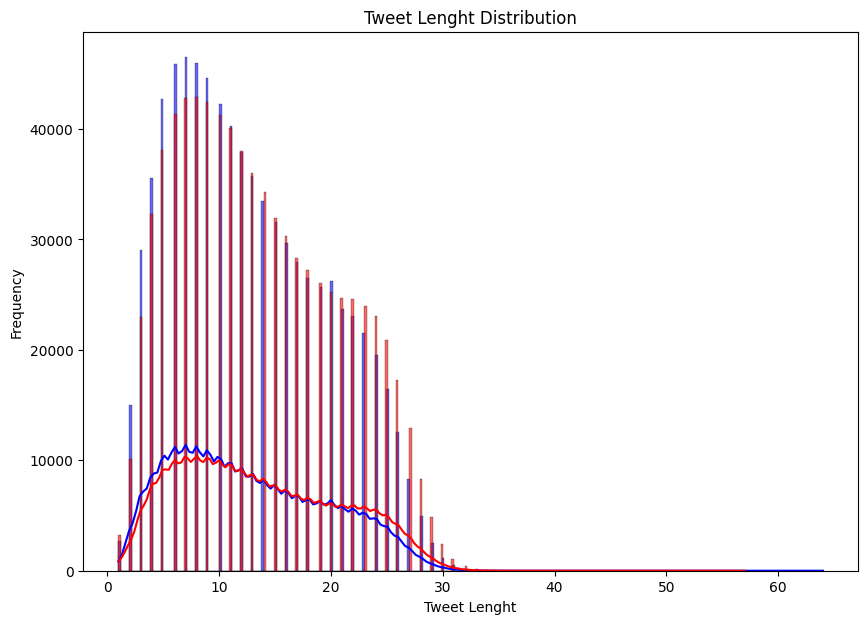

In [8]:
# Distribution
plt.figure(figsize=(10,7))
sns.histplot(df[df['sentiment']=='positive']['text_len'], kde=True, color='blue', label='positive', alpha=0.6)
sns.histplot(df[df['sentiment']=='negative']['text_len'], kde=True, color='red', label='negative',alpha = 0.6)
plt.xlabel('Tweet Lenght')
plt.ylabel('Frequency')
plt.title('Tweet Lenght Distribution')
plt.show()

<h4 style="color:turtle"> 3.2 Word Cloud Visualization </h4>

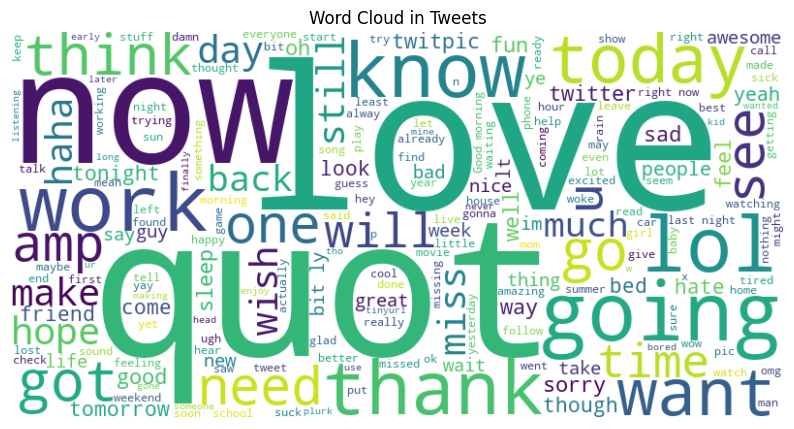

In [9]:
# Combing all text into a single column from text column
all_text = ' '.join(df['text'])

# object creation
wc = WordCloud(width=800, height=400, background_color='white').generate(all_text) # 

# Diplay
plt.figure(figsize=(10,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud in Tweets')
plt.show()

- `combine` before word cloud must be converted in single text or corpus
- `generate` method is used to create the word cloud from the combined text.

<h2 style="color:purple"> 4.0 Detecting Stopwords </h3>

In [10]:
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
print(f' List of stopwords:\n {stops}')

 List of stopwords:
 {'both', 'doesn', "you've", 'then', 'in', 'myself', 'once', 'here', 'themselves', 'more', 'herself', 'few', 'having', 'm', 'who', 'we', 'isn', 'should', 'are', 'such', 'not', 'hers', 'own', 'have', 'o', "didn't", 'just', 'weren', 'an', 'wouldn', 'i', 'ourselves', 'doing', 'again', 'same', 'because', 'had', 's', 'you', 'ain', 'all', 'was', 'between', 'from', 'when', "doesn't", 'most', 'be', 'aren', 'been', 'it', 'under', 'wasn', 'these', 'over', 'about', 'd', 'below', "you're", 'those', "aren't", "that'll", 'while', "couldn't", "mustn't", 'ma', "weren't", 'until', "shouldn't", 'couldn', "shan't", "it's", 'our', 're', 'the', 'my', 'but', "you'll", 'were', 'his', 'does', 'very', 'don', 'other', 'won', 've', 'on', 'some', 'as', 'by', 'for', 'any', 'only', 'll', 'has', 'your', 'y', 'than', 'will', 'up', 'hadn', "mightn't", 'yours', "should've", 'before', 'down', "needn't", 'himself', "haven't", "hadn't", 'needn', 'itself', 'what', 'her', 'of', 'didn', "don't", 'they', '

In [11]:
print(f'Total {len(stops)} stopwords found')

Total 179 stopwords found


<h3 style="color:purple"> 5.0 Word Cloud Excluding Stopwords and Special Characters </h3>

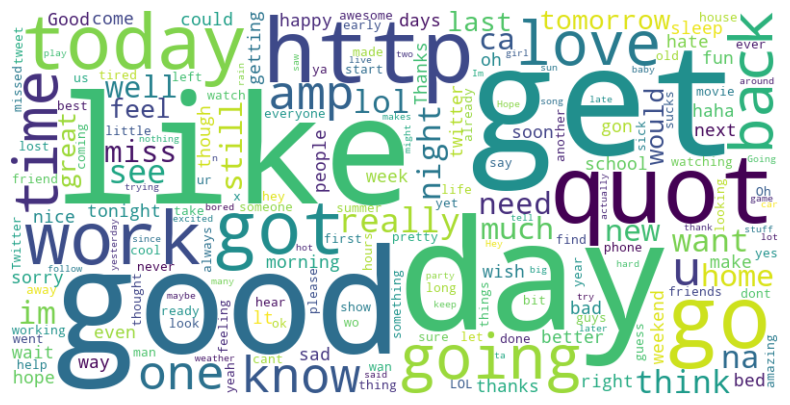

In [14]:
# Combine all text data into a single corpus
corpus = ' '.join(df['text'])

# Tokenize the text
tokens = nltk.word_tokenize(corpus)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Count word frequencies
word_freq = Counter(filtered_tokens)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<h3 style="color:purple"> 6.0 Most Common Word Distribution </h3>

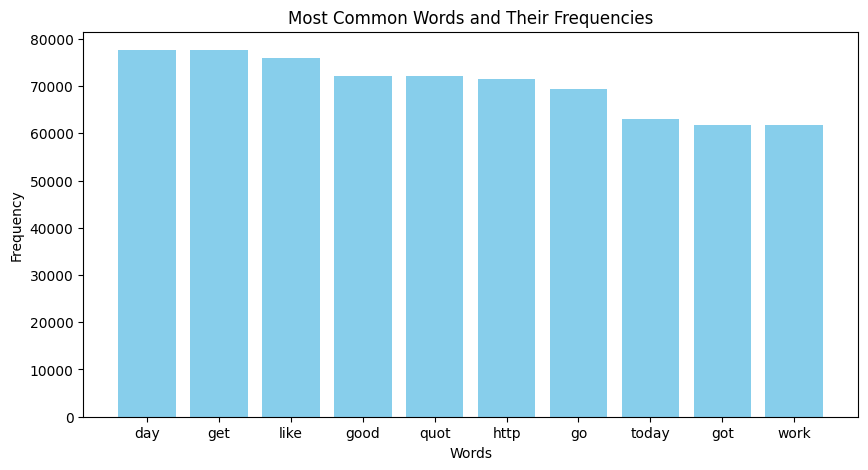

In [15]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Combine all text data into a single corpus
corpus = ' '.join(df['text'])

# Tokenize the text
tokens = nltk.word_tokenize(corpus)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Count word frequencies
word_freq = Counter(filtered_tokens)

# Get the most common words
most_common_words = word_freq.most_common(10)

# Convert to DataFrame for visualization
word_freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the word frequencies
plt.figure(figsize=(10, 5))
plt.bar(word_freq_df['Word'], word_freq_df['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words and Their Frequencies')
plt.show()


<h3 style="color:purple"> 7.1 Most Common Postive & Negative Words Vasualization - BarChart </h3>

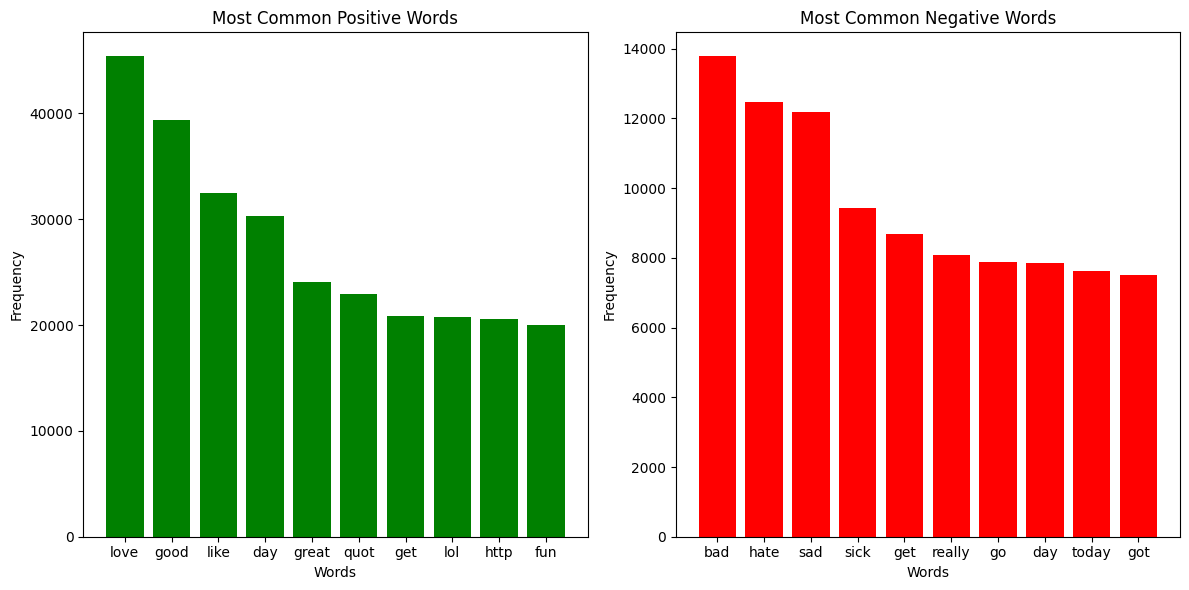

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # to get sentiment scores for each sentence
from collections import Counter

# Initialize Sentiment Intensity Analyzer ::The scores include positive, negative, neutral
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)   # its a method to derived from sia used to get scores

# Apply sentiment analysis on the text column
df['scores'] = df['text'].apply(get_sentiment_scores)
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])

# Separate positive and negative sentences
positive_sentences = df[df['compound'] >= 0.5]['text']
negative_sentences = df[df['compound'] <= -0.5]['text']

# Tokenize and filter words
stop_words = set(stopwords.words('english'))

def tokenize_and_filter(sentences):
    words = []
    for text in sentences:
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word.isalpha() and word.lower() not in stop_words] # list comprehension
        words.extend(filtered_tokens)
    return words

positive_words = tokenize_and_filter(positive_sentences)
negative_words = tokenize_and_filter(negative_sentences)

# Count word frequencies
positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

# Get the most common positive and negative words
most_common_positive = positive_word_freq.most_common(10)
most_common_negative = negative_word_freq.most_common(10)

# Convert to DataFrame for visualization
positive_df = pd.DataFrame(most_common_positive, columns=['Word', 'Frequency'])
negative_df = pd.DataFrame(most_common_negative, columns=['Word', 'Frequency'])

# Plot the word frequencies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(positive_df['Word'], positive_df['Frequency'], color='green')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Positive Words')

plt.subplot(1, 2, 2)
plt.bar(negative_df['Word'], negative_df['Frequency'], color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Negative Words')

plt.tight_layout()
plt.show()


<h3 style="color:purple"> 7.2 Most Common Postive & Negative Words Vasualization - Word Cloud </h3>

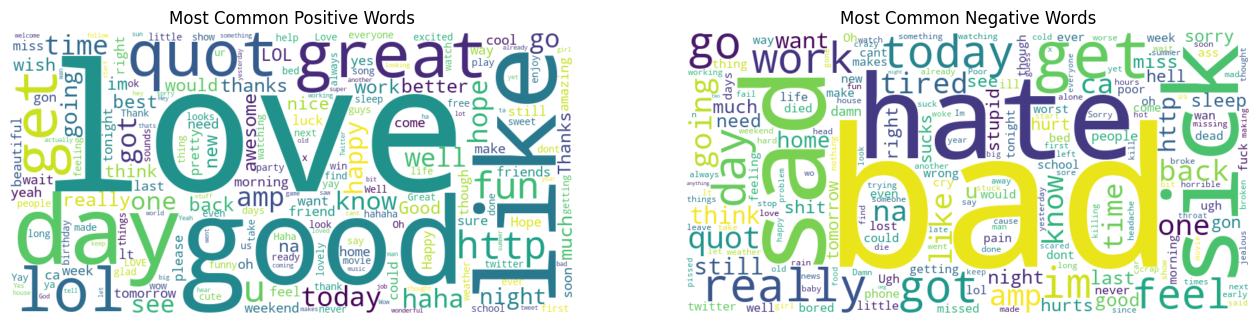

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_word_freq)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_word_freq)

# Plot the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)   # row:col:position
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Positive Words')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Negative Words')

plt.show()


<h3 align=center> The End </h3>